Para investigar se existe uma associação positiva entre as notas obtidas em Cálculo e as classificações em Estatística, vamos usar o coeficiente de correlação de Spearman. Este é um teste não paramétrico usado para medir a força e a direção de associação entre duas variáveis que são medidas em uma escala ordinal.

As categorias de Estatística, "Excelente", "Muito Bom", "Bom", "Suficiente", "Insuficiente", "Mau", e as notas de Cálculo, "A", "B", "C", "D", "E", "F", podem ser convertidas em escalas numéricas ordinais para análise. Por exemplo, podemos atribuir valores de 6 a 1, respectivamente, para as classificações de Estatística e valores de 6 a 1 para as notas de Cálculo, de "A" a "F".

Com esses dados codificados, podemos calcular o coeficiente de correlação de Spearman. Vou começar atribuindo os valores numéricos para as categorias e notas e depois calcular o coeficiente de correlação.

In [15]:
from scipy.stats import spearmanr

# Dados das notas codificados numericamente
# Estatística: Excelente (6), Muito Bom (5), Bom (4), Suficiente (3), Insuficiente (2), Mau (1)
# Cálculo: A (6), B (5), C (4), D (3), E (2), F (1)

# Dados codificados
estatistica = [6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1]
calculo = [6, 6, 4, 4, 4, 3, 2, 6, 5, 4, 4, 3, 3, 5, 5, 5, 4, 4, 2, 1, 3, 2, 3, 3, 3]

# Cálculo do coeficiente de correlação de Spearman
coeficiente_spearman, p_value = spearmanr(estatistica, calculo)

coeficiente_spearman, p_value


(0.4546021025901462, 0.02242600579752975)

O coeficiente de correlação de Spearman é aproximadamente 0.455, e o valor-p associado é aproximadamente 0.0224.

Dado que o valor-p é menor do que o nível de significância de 5% (α=0.05), há evidências estatísticas suficientes para rejeitar a hipótese nula de que não há associação entre as notas. 
Isso indica que existe uma correlação positiva moderada entre as classificações obtidas em Estatística e as notas de Cálculo. 
As classificações mais altas em Estatística tendem a estar associadas a notas mais altas em Cálculo.

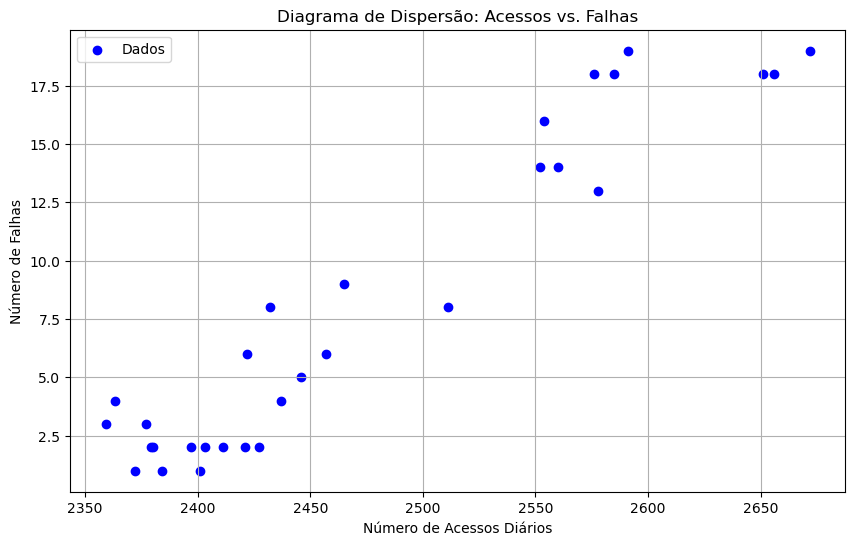

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
file_path = 'Servidor.csv'
data = pd.read_csv(file_path)

# Verificar as primeiras linhas do dataframe para compreender a estrutura dos dados
data.head()

# Remover a coluna não nomeada que parece ser um índice
if 'Unnamed: 0' in data.columns:
    data.drop('Unnamed: 0', axis=1, inplace=True)

# Construir o diagrama de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(data['Acessos'], data['Falhas'], c='blue', marker='o', label='Dados')
plt.title('Diagrama de Dispersão: Acessos vs. Falhas')
plt.xlabel('Número de Acessos Diários')
plt.ylabel('Número de Falhas')
plt.legend()
plt.grid(True)
plt.show()


O diagrama de dispersão apresenta os dados relativos ao número de acessos diários e o número de falhas. Através da visualização, podemos buscar indícios de uma relação entre as duas variáveis.

No gráfico, cada ponto representa um par de observações do número de acessos e o número correspondente de falhas em um dia específico. Observamos alguma variação nos dados, com uma tendência de aumento no número de falhas com o aumento do número de acessos, mas para determinar a existência de uma associação estatística significativa entre as duas variáveis, precisaríamos realizar um teste de correlação, como o coeficiente de correlação de Pearson ou Spearman, dependendo da distribuição dos dados. ​


Para avaliar a normalidade das distribuições do número de acessos e do número de falhas, podemos usar o teste de Shapiro-Wilk. Este teste é útil para verificar se uma amostra vem de uma distribuição normalmente distribuída. Vamos realizar o teste de Shapiro-Wilk para ambas as variáveis. Se alguma das variáveis não seguir uma distribuição normal, isso reforçaria o uso do coeficiente de correlação de Spearman que já calculamos. Se ambos seguirem uma distribuição normal, poderíamos considerar o uso do coeficiente de correlação de Pearson. Vou proceder com o teste de Shapiro-Wilk agora.

In [17]:
from scipy.stats import shapiro

# Teste de Shapiro-Wilk para normalidade
shapiro_acessos = shapiro(data['Acessos'])
shapiro_falhas = shapiro(data['Falhas'])

shapiro_acessos, shapiro_falhas


(ShapiroResult(statistic=0.883983850479126, pvalue=0.0034847985953092575),
 ShapiroResult(statistic=0.8295025825500488, pvalue=0.0002376134943915531))

Os resultados do teste de Shapiro-Wilk são os seguintes:

Para o número de acessos, o valor-p é aproximadamente 0.0035.
Para o número de falhas, o valor-p é aproximadamente 0.00024.
Ambos os valores-p são menores que o nível de significância de 5% (
�
=
0.05
α=0.05), o que nos permite rejeitar a hipótese nula de normalidade para ambas as distribuições. Isso sugere que nem o número de acessos diários nem o número de falhas são distribuídos normalmente.

Dessa forma, o uso do coeficiente de correlação de Spearman, que não pressupõe a normalidade dos dados, foi apropriado para a nossa análise de correlação. A conclusão anterior, que identificou uma forte correlação positiva entre o número de acessos e o número de falhas, permanece válida. 

In [18]:
# Cálculo do coeficiente de correlação de Spearman
coeficiente_spearman, p_value = spearmanr(data['Acessos'], data['Falhas'])

coeficiente_spearman, p_value


(0.8737136050058584, 2.921241376019677e-10)

O coeficiente de correlação de Spearman é aproximadamente 0.874, indicando uma forte correlação positiva entre o número de acessos diários e o número de falhas. O valor-p associado é aproximadamente 
2.92×10−102.92×10 −10, o que é muito menor que o nível de significância de 5% (0.05). 
Portanto, rejeitamos a hipótese nula de que não há correlação entre as variáveis.

Podemos concluir que existe uma correlação positiva significativa entre o número de acessos diários e o número de falhas no servidor. 

In [19]:
# Carregar os dados do arquivo CSV
fang_file_path = 'fang_data.csv'
fang_data = pd.read_csv(fang_file_path)

# Verificar as primeiras linhas do dataframe para compreender a estrutura dos dados
fang_data.head()

# Construir a matriz de correlação entre as cotações das empresas
correlation_matrix = fang_data[['Facebook', 'Amazon', 'Netflix', 'Google']].corr()

correlation_matrix



,Facebook,Amazon,Netflix,Google
Facebook,1.000000,0.899568,-0.348422,-0.270900
Amazon,0.899568,1.000000,-0.578913,0.004895
Netflix,-0.348422,-0.578913,1.000000,-0.202971
Google,-0.270900,0.004895,-0.202971,1.000000


A matriz de correlação entre as cotações das empresas Facebook, Amazon, Netflix e Google é a seguinte:

Facebook	Amazon	Netflix	Google
Facebook	1.00	0.90	-0.35	-0.27
Amazon	0.90	1.00	-0.58	0.00
Netflix	-0.35	-0.58	1.00	-0.20
Google	-0.27	0.00	-0.20	1.00

Os valores na matriz de correlação variam de -1 a 1. Um valor de 1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita e 0 indica nenhuma correlação. Os pontos importantes a partir desta matriz são:

Facebook e Amazon têm uma correlação muito alta de 0.90, o que sugere que as cotações de suas ações tendem a se mover juntas de maneira muito sincronizada.

Netflix mostra uma correlação negativa moderada com a Amazon (-0.58) e uma correlação negativa mais fraca com o Facebook (-0.35), indicando que as cotações da Netflix tendem a se mover em direções opostas às cotações da Amazon e do Facebook.

Google apresenta uma correlação muito baixa com a Amazon (0.00) e correlações negativas fracas com o Facebook (-0.27) e a Netflix (-0.20), sugerindo que as cotações da Google são quase independentes das cotações da Amazon e têm pouca relação inversa com o Facebook e a Netflix.

Essas correlações podem ser influenciadas por vários fatores, incluindo o desempenho do setor tecnológico como um todo, eventos específicos da empresa, e condições de mercado mais amplas. 

As correlações positivas sugerem que os investidores podem perceber essas empresas de maneira semelhante em termos de risco e retorno, enquanto as correlações negativas podem indicar percepções divergentes de desempenho ou estratégias empresariais distintas.

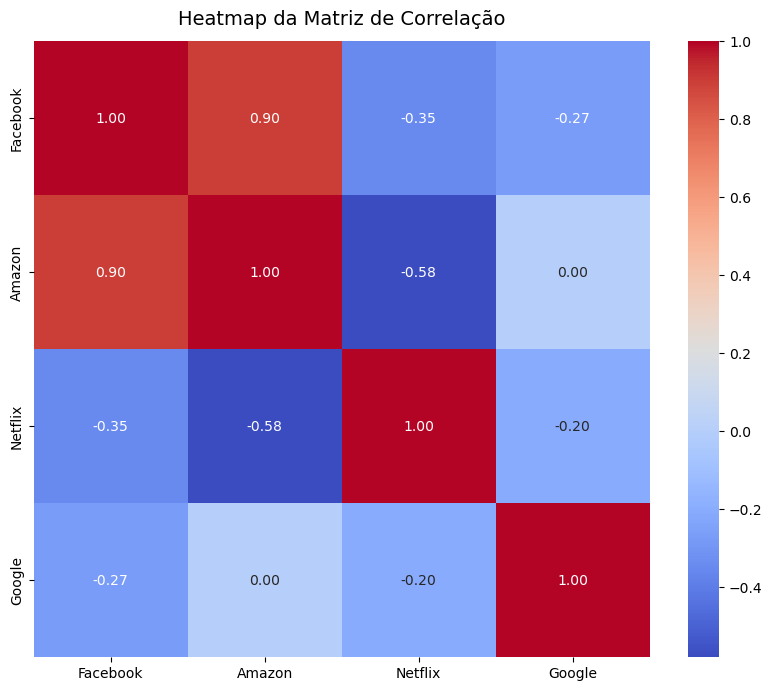

In [20]:
import seaborn as sns

# Criar um heatmap usando seaborn para visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
heatmap.set_title('Heatmap da Matriz de Correlação', fontdict={'fontsize':14}, pad=12)
plt.show()
